In [1]:
%pip install rdkit-pypi
%pip install py3Dmol
%pip install git+https://github.com/samoturk/mol2vec
%pip install openvino_tensorflow



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/samoturk/mol2vec to /private/var/folders/3m/knb96f9s4xg2t2gcrl96r6jh0000gn/T/pip-req-build-y7ov2bs8
  Running command git clone --filter=blob:none --quiet https://github.com/samoturk/mol2vec /private/var/folders/3m/knb96f9s4xg2t2gcrl96r6jh0000gn/T/pip-req-build-y7ov2bs8
  Resolved https://github.com/samoturk/mol2vec to commit 850d944d5f48a58e26ed0264332b5741f72555aa
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement openvino_tensorflow (from versions: none)
ERROR: No matching distribution found for openvino_tensorflow
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline

import numpy as np                #!pip install numpy
import pandas as pd               #!pip install pandas
import matplotlib.pyplot as plt   #!pip install matplotlib
import seaborn as sns             #!pip install seaborn

In [28]:
df = pd.read_csv('./submissions/test_linear.csv')
df

,id,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TEST_000,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,2.641,361.505,4,2,7,2.635,92.76
1,TEST_001,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,0.585,370.399,5,0,3,0.585,68.31
2,TEST_002,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1,4.276,347.414,4,4,5,4.290,92.86
3,TEST_003,O=C(c1nc2ncccn2n1)N1CCCn2cc(-c3ccccc3)nc21,1.795,345.358,5,0,2,1.795,81.21
4,TEST_004,CCN1CCN(C(=O)c2cc3c(=O)n4cc(C)ccc4nc3n2C)CC1,1.219,353.418,4,0,2,0.169,61.15
...,...,...,...,...,...,...,...,...,...
478,TEST_478,CCc1noc(CC)c1CC(=O)NCC1(CC)CCCCC1,4.207,306.443,2,1,7,4.207,55.13
479,TEST_479,CC(=O)N1CCC2(CC1)OC(=O)C(C)=C2C(=O)N1CCN(C)CC1,-0.608,335.398,5,0,1,-1.736,70.16
480,TEST_480,CC(C)NC(=O)CN1C(=O)c2ccccc2N2C(=O)c3ccccc3C12,1.792,349.383,3,1,3,1.792,69.72
481,TEST_481,Cn1cc(Br)c(=O)c(NC(=O)c2ccc(O)cc2F)c1,0.790,341.132,3,2,2,0.423,69.64


In [29]:
#Importing Chem module
from rdkit import Chem 

#Method transforms smiles strings to mol rdkit object
df['mol'] = df['SMILES'].apply(lambda x: Chem.MolFromSmiles(x)) 

df.head()

,id,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,mol
0,TEST_000,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,2.641,361.505,4,2,7,2.635,92.76,<rdkit.Chem.rdchem.Mol object at 0x13b7fb660>
1,TEST_001,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,0.585,370.399,5,0,3,0.585,68.31,<rdkit.Chem.rdchem.Mol object at 0x2af0f7f90>
2,TEST_002,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1,4.276,347.414,4,4,5,4.290,92.86,<rdkit.Chem.rdchem.Mol object at 0x2af0f7ac0>
3,TEST_003,O=C(c1nc2ncccn2n1)N1CCCn2cc(-c3ccccc3)nc21,1.795,345.358,5,0,2,1.795,81.21,<rdkit.Chem.rdchem.Mol object at 0x2af0f7b30>
4,TEST_004,CCN1CCN(C(=O)c2cc3c(=O)n4cc(C)ccc4nc3n2C)CC1,1.219,353.418,4,0,2,0.169,61.15,<rdkit.Chem.rdchem.Mol object at 0x2af0f79e0>


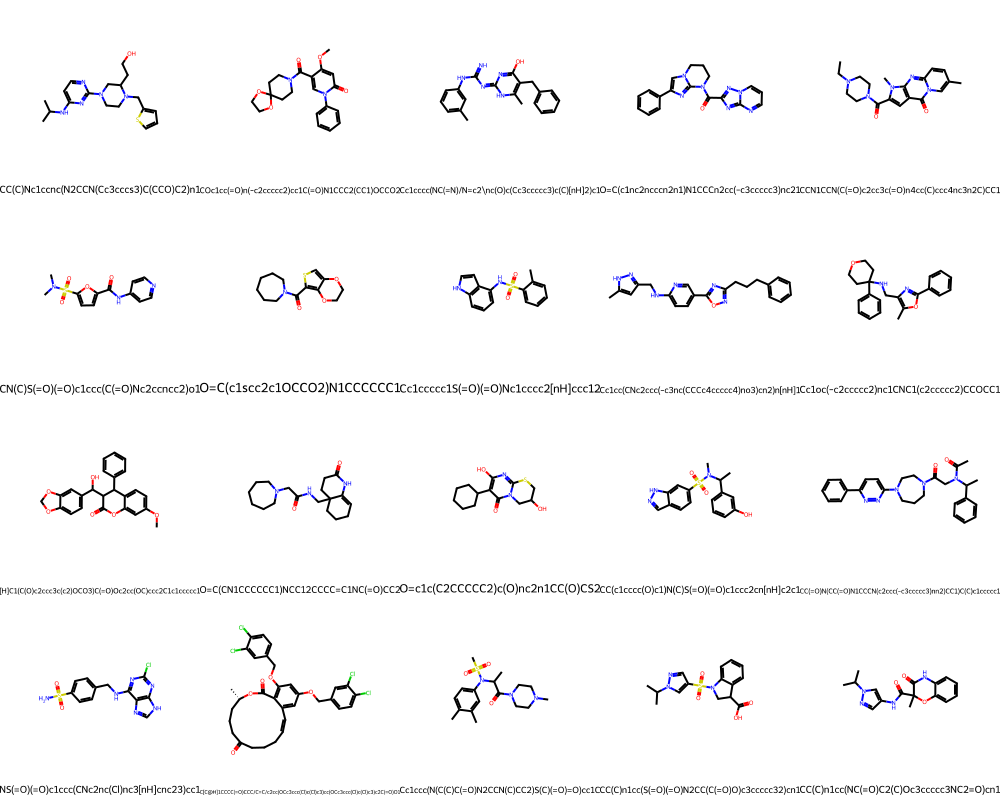

In [30]:
from rdkit.Chem import Draw

number_to_print = 20
mols = df['mol'][:number_to_print]

#MolsToGridImage allows to show several molecules in a grid
Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True, legends=list(df['SMILES'][:number_to_print].values))

In [31]:
import py3Dmol  # pip install py3Dmol
from ipywidgets import interact,fixed,IntSlider
import ipywidgets

def show3D_molecule(idx, style):
    """
    Show molecule in 3D
    """
    mblock = Chem.MolToMolBlock(df['mol'].iloc[idx])
    viewer = py3Dmol.view(width=300, height=300)
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    viewer.rotate(45, "y", animationDuration=1)
   
    viewer.zoomTo()
    
    print(f"SMILES notation: {df['SMILES'].iloc[idx]}\nRotate me!");
    
    return viewer.show()
  
interact(show3D_molecule, 
         idx=ipywidgets.IntSlider(min=0,max=len(df["mol"])-1, 
                                  step=1, value=3064, 
                                  description="Molecule"),
         style=ipywidgets.Dropdown(options=['line', 'stick', 'sphere'],
                                   value='stick',
                                   description='Style:'));

interactive(children=(IntSlider(value=482, description='Molecule', max=482), Dropdown(description='Style:', in…

In [32]:
# AddHs function adds H atoms to a MOL (as Hs in SMILES are usualy ignored)
df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))

In [33]:
# GetNumAtoms() method returns a general nubmer of all atoms in a molecule
df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms())

# GetNumHeavyAtoms() method returns a nubmer of all atoms in a molecule with molecular weight > 1
df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms())

In [34]:
#We're going to searches patterns and use it for a list of most common atoms only
def number_of_atoms(atom_list, df):
    for i in atom_list:
        df['num_of_{}_atoms'.format(i)] = df['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(['C', 'O', 'N', 'Cl', 'P', 'Br', 'F'], df)

In [35]:
from rdkit.Chem import Descriptors
df['tpsa'] = df['mol'].apply(lambda x: Descriptors.TPSA(x)) #https://en.wikipedia.org/wiki/Polar_surface_area
df['mol_w'] = df['mol'].apply(lambda x: Descriptors.ExactMolWt(x)) # https://en.wikipedia.org/wiki/Molecular_mass
df['num_valence_electrons'] = df['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x)) # https://en.wikipedia.org/wiki/Valence_electron
df['num_heteroatoms'] = df['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))

In [36]:
df.head()

,id,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,mol,...,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_P_atoms,num_of_Br_atoms,num_of_F_atoms,tpsa,mol_w,num_valence_electrons,num_heteroatoms
0,TEST_000,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,2.641,361.505,4,2,7,2.635,92.76,<rdkit.Chem.rdchem.Mol object at 0x14fdf3cf0>,...,1,5,0,0,0,0,64.52,361.193631,136,7
1,TEST_001,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,0.585,370.399,5,0,3,0.585,68.31,<rdkit.Chem.rdchem.Mol object at 0x14fdf3b30>,...,5,2,0,0,0,0,70.00,370.152872,142,7
2,TEST_002,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1,4.276,347.414,4,4,5,4.290,92.86,<rdkit.Chem.rdchem.Mol object at 0x14fdf3a50>,...,1,5,0,0,0,0,97.15,347.174610,132,6
3,TEST_003,O=C(c1nc2ncccn2n1)N1CCCn2cc(-c3ccccc3)nc21,1.795,345.358,5,0,2,1.795,81.21,<rdkit.Chem.rdchem.Mol object at 0x14fdf3970>,...,1,7,0,0,0,0,81.21,345.133808,128,8
4,TEST_004,CCN1CCN(C(=O)c2cc3c(=O)n4cc(C)ccc4nc3n2C)CC1,1.219,353.418,4,0,2,0.169,61.15,<rdkit.Chem.rdchem.Mol object at 0x2af492430>,...,2,5,0,0,0,0,62.85,353.185175,136,7


In [37]:
import requests

url = 'https://github.com/samoturk/mol2vec_notebooks/raw/master/Notebooks/model_300dim.pkl'
file_to_download = requests.get(url, allow_redirects=True)

open('model_300dim.pkl', 'wb').write(file_to_download.content)

26567327

In [38]:
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec

In [39]:
#Loading pre-trained model via word2vec
from gensim.models import word2vec  # https://radimrehurek.com/gensim/index.html#install
w2vec_model = word2vec.Word2Vec.load('model_300dim.pkl') # Download from https://github.com/samoturk/mol2vec_notebooks/blob/master/Notebooks/model_300dim.pkl

In [40]:
#Constructing sentences
df['sentence'] = df.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)

#Extracting embeddings to a numpy.array
#Note that we always should mark unseen='UNK' in sentence2vec() so that model is taught how to handle unknown substructures
df['mol2vec'] = [DfVec(x) for x in sentences2vec(df['sentence'], w2vec_model, unseen='UNK')]
df

,id,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,mol,...,num_of_Cl_atoms,num_of_P_atoms,num_of_Br_atoms,num_of_F_atoms,tpsa,mol_w,num_valence_electrons,num_heteroatoms,sentence,mol2vec
0,TEST_000,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,2.641,361.505,4,2,7,2.635,92.76,<rdkit.Chem.rdchem.Mol object at 0x14fdf3cf0>,...,0,0,0,0,64.52,361.193631,136,7,"(2246728737, 3763848841, 2245273601, 124352879...","(100,) dimensional vector"
1,TEST_001,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,0.585,370.399,5,0,3,0.585,68.31,<rdkit.Chem.rdchem.Mol object at 0x14fdf3b30>,...,0,0,0,0,70.00,370.152872,142,7,"(2246728737, 1024462557, 864674487, 2076190208...","(100,) dimensional vector"
2,TEST_002,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1,4.276,347.414,4,4,5,4.290,92.86,<rdkit.Chem.rdchem.Mol object at 0x14fdf3a50>,...,0,0,0,0,97.15,347.174610,132,6,"(2246728737, 447750523, 3217380708, 3207567135...","(100,) dimensional vector"
3,TEST_003,O=C(c1nc2ncccn2n1)N1CCCn2cc(-c3ccccc3)nc21,1.795,345.358,5,0,2,1.795,81.21,<rdkit.Chem.rdchem.Mol object at 0x14fdf3970>,...,0,0,0,0,81.21,345.133808,128,8,"(864942730, 1510328189, 2246699815, 729796064,...","(100,) dimensional vector"
4,TEST_004,CCN1CCN(C(=O)c2cc3c(=O)n4cc(C)ccc4nc3n2C)CC1,1.219,353.418,4,0,2,0.169,61.15,<rdkit.Chem.rdchem.Mol object at 0x2af492430>,...,0,0,0,0,62.85,353.185175,136,7,"(2246728737, 245196591, 2245384272, 593804746,...","(100,) dimensional vector"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,TEST_478,CCc1noc(CC)c1CC(=O)NCC1(CC)CCCCC1,4.207,306.443,2,1,7,4.207,55.13,<rdkit.Chem.rdchem.Mol object at 0x2af4b7ac0>,...,0,0,0,0,55.13,306.230728,124,4,"(2246728737, 245196591, 2245384272, 934143565,...","(100,) dimensional vector"
479,TEST_479,CC(=O)N1CCC2(CC1)OC(=O)C(C)=C2C(=O)N1CCN(C)CC1,-0.608,335.398,5,0,1,-1.736,70.16,<rdkit.Chem.rdchem.Mol object at 0x2af4b7b30>,...,0,0,0,0,70.16,335.184506,132,7,"(2246728737, 2113675549, 2246699815, 283456642...","(100,) dimensional vector"
480,TEST_480,CC(C)NC(=O)CN1C(=O)c2ccccc2N2C(=O)c3ccccc3C12,1.792,349.383,3,1,3,1.792,69.72,<rdkit.Chem.rdchem.Mol object at 0x2af4b7ba0>,...,0,0,0,0,69.72,349.142641,132,6,"(2246728737, 3763848841, 2245273601, 124352879...","(100,) dimensional vector"
481,TEST_481,Cn1cc(Br)c(=O)c(NC(=O)c2ccc(O)cc2F)c1,0.790,341.132,3,2,2,0.423,69.64,<rdkit.Chem.rdchem.Mol object at 0x2af4abac0>,...,0,0,1,1,71.33,339.985883,104,7,"(2246728737, 241489735, 2092489639, 3160718262...","(100,) dimensional vector"


In [41]:
len(df.columns)

25

In [42]:
X = np.array([x.vec for x in df['mol2vec']])

In [43]:
X = pd.concat((pd.DataFrame(X), df.drop(["mol2vec", "sentence", "SMILES", "mol"], axis=1)), axis=1)

In [44]:
X

,0,1,2,3,4,5,6,7,8,9,...,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_P_atoms,num_of_Br_atoms,num_of_F_atoms,tpsa,mol_w,num_valence_electrons,num_heteroatoms
0,-11.474562,8.826587,-18.002735,0.343318,-7.680605,-12.569728,16.145493,-3.774625,-16.655472,-41.632702,...,1,5,0,0,0,0,64.52,361.193631,136,7
1,-12.076982,10.412974,-14.203115,-4.227116,-7.704481,-11.115671,11.265069,-6.671052,-10.993878,-33.517380,...,5,2,0,0,0,0,70.00,370.152872,142,7
2,-6.765956,7.657161,-14.484673,1.708898,-8.112830,-12.288434,15.842736,-4.965173,-14.625880,-37.580746,...,1,5,0,0,0,0,97.15,347.174610,132,6
3,-9.219436,3.820815,-12.970413,-2.014155,-6.758518,-7.303709,8.153727,-7.726965,-11.245914,-30.258991,...,1,7,0,0,0,0,81.21,345.133808,128,8
4,-11.032508,7.004620,-15.490973,-0.739185,-7.904306,-12.379946,12.170202,-6.220407,-13.440228,-36.013245,...,2,5,0,0,0,0,62.85,353.185175,136,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,-11.049179,9.680999,-13.930267,1.442693,-7.101587,-14.183693,18.446304,-4.506440,-16.208666,-41.124817,...,2,2,0,0,0,0,55.13,306.230728,124,4
479,-11.383096,6.405295,-14.035508,-4.677548,-6.696561,-13.060544,12.991319,-5.910546,-11.507502,-32.115677,...,4,3,0,0,0,0,70.16,335.184506,132,7
480,-7.658268,8.880835,-13.512918,-1.240038,-7.578472,-14.912004,6.424142,-7.335841,-12.759425,-27.264845,...,3,3,0,0,0,0,69.72,349.142641,132,6
481,-6.245023,3.090611,-9.065438,-0.709873,-7.482090,-8.450665,3.533954,-6.331230,-6.305512,-20.321054,...,3,2,0,0,1,1,71.33,339.985883,104,7


In [45]:
len(X.columns)

121

In [46]:
X.to_csv('test_mol2vec.csv')